In [41]:
"""
Created on Thu Sep 30 10:15:33 2021

@author: kirahart
"""

from SQL import create_db_connection, execute_query, read_query
import h5py
import datetime

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title




In [42]:
dftelem = pd.read_csv('/Volumes/KESU/SQL_Queries/Measurements.csv')

In [43]:
#user_info
pw = "p0larizati0n"
user = "root"
db = "IRCSP"

#connect to IRCSP database
connection = create_db_connection("localhost", user, pw, db)

MySQL Database connection successful


In [171]:
def query_wavelength(db, wavelength,camera):
    string = ''' SELECT id, camera, val '''
    string += '''FROM '''+ db + ''' '''
    string+= '''WHERE wavelength = ''' + str(wavelength) +''' AND camera ='''+ str(camera)+''';'''
    return(string)

def query_id(db, idn,camera):
    string = ''' SELECT wavelength, camera, val '''
    string += '''FROM '''+ db + ''' '''
    string+= '''WHERE id = ''' + str(idn) +''' AND camera ='''+ str(camera)+''';'''
    return(string)
    

In [172]:
def db_wavelength(db, wavelength,camera):
    # Returns a list of lists and then creates a pandas DataFrame
    from_db = []
    query = query_wavelength(db, wavelength,camera);
    results = read_query(connection,query)

    for result in results:
      result = list(result)
      from_db.append(result)


    columns = ["id", "camera", "value"]
    df = pd.DataFrame(from_db, columns=columns)
    
    return(df)

def db_id(db, idn,camera):
    # Returns a list of lists and then creates a pandas DataFrame
    from_db = []
    query = query_id(db, idn,camera);
    results = read_query(connection,query)

    for result in results:
      result = list(result)
      from_db.append(result)


    columns = ["wavelength", "camera", "value"]
    df = pd.DataFrame(from_db, columns=columns)
    
    return(df)

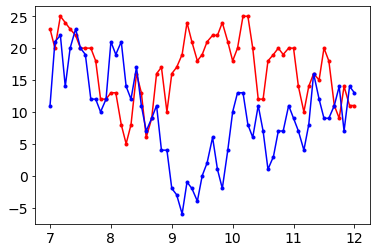

In [224]:
offset = 50;

db1ref = db_id('IRCSP.rawdata', 1366,1)
db2ref = db_id('IRCSP.rawdata', 1366,2)
ref1 = np.array(db1ref['value']+offset)
ref2 = np.array(db2ref['value']+offset)
plt.plot(db1ref['wavelength'],ref1,'r.-')
plt.plot(db1ref['wavelength'],ref2,'b.-')
#plt.ylim(0,400)

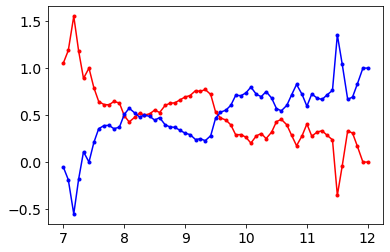

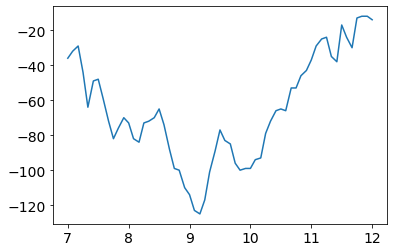

In [226]:

index = 2051;

db1 = db_id('IRCSP.rawdata', index,1)
db2 = db_id('IRCSP.rawdata', index,2)
val1 =np.array(db1['value'])+ offset 
val2 =np.array(db2['value'])+ offset 
norm =  val1 + val2;
plt.plot(db1['wavelength'],val1/norm,'r.-')
plt.plot(db2['wavelength'],val2/norm,'b.-')
#plt.ylim([.25,.75])
plt.show()

plt.plot(db1['wavelength'],norm);

In [227]:
#TAKE X DATA FROM MEASUREMENTS 

cam1t    = dftelem['cam1_temp']
humidity = dftelem['humidity']

df8_1 =  db_wavelength('IRCSP.rawdata', 8,1)
df8_2 =  db_wavelength('IRCSP.rawdata', 8,2)
df9_1 =  db_wavelength('IRCSP.rawdata', 9,1)
df9_2 =  db_wavelength('IRCSP.rawdata', 9,2)
df10_1 =  db_wavelength('IRCSP.rawdata', 10,1)
df10_2 =  db_wavelength('IRCSP.rawdata', 10,2)
df11_1 =  db_wavelength('IRCSP.rawdata', 11,1)
df11_2 =  db_wavelength('IRCSP.rawdata', 11,2)
df12_1 =  db_wavelength('IRCSP.rawdata', 12,1)
df12_2 =  db_wavelength('IRCSP.rawdata', 12,2)

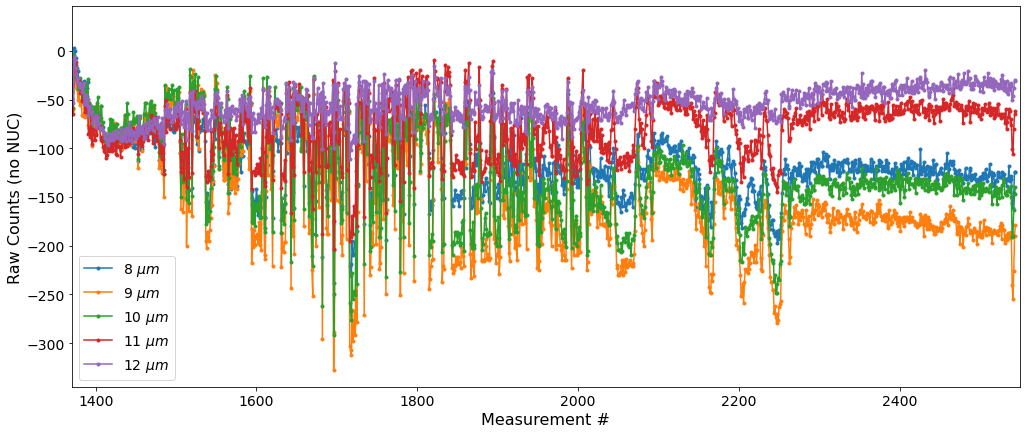

In [228]:
plt.figure(figsize=(17, 7))
plt.plot(df8_1["value"]+df8_2["value"]+50 , '.-',label = '8 $ \mu m$')
plt.plot(df9_1["value"]+df9_2["value"]+50 , '.-',label = '9 $ \mu m$')
plt.plot(df10_1["value"]+df10_2["value"]+50 , '.-',label = '10 $ \mu m$')
plt.plot(df11_1["value"]+df11_2["value"]+50, '.-',label = '11 $ \mu m$')
plt.plot(df12_1["value"]+df12_2["value"]+50, '.-',label = '12 $ \mu m$')

plt.legend()
plt.xlim(1370,2550)
plt.xlabel('Measurement #')
plt.ylabel('Raw Counts (no NUC)')
plt.show()

In [190]:
x1 = dftelem.query('meas_id>1366 & cam1_temp < 37')['cam1_temp']
xhum = dftelem.query('meas_id>1366 & cam1_temp < 37')['humidity']
x= dftelem.query('meas_id>1366 & cam1_temp < 37')['meas_id']

dfselect8 = df8.loc[df8['id'].isin(x)]
dfs8 = dfselect8.loc[dfselect8['position']==125]

dfselect9 = df9.loc[df9['id'].isin(x)]
dfs9 = dfselect9.loc[dfselect9['position']==125]

dfselect10 = df10.loc[df10['id'].isin(x)]
dfs10 = dfselect10.loc[dfselect10['position']==125]

dfselect11 = df11.loc[df11['id'].isin(x)]
dfs11 = dfselect11.loc[dfselect10['position']==125]

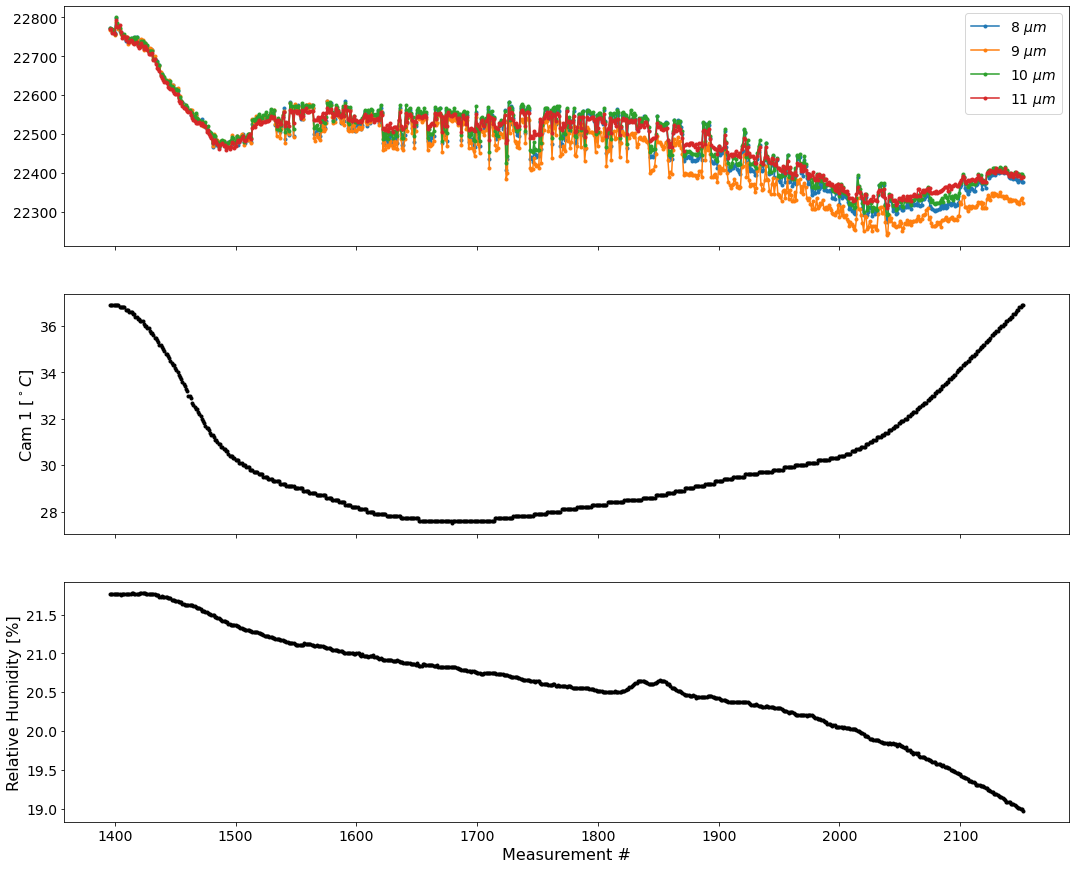

In [238]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize = (18,15),sharex = True)
ax[0].plot(x,np.array(dfs8['val']),'.-',label = '8 $ \mu m$')
ax[0].plot(x,np.array(dfs9['val']),'.-',label = '9 $ \mu m$')
ax[0].plot(x,np.array(dfs10['val']),'.-',label = '10 $ \mu m$')
ax[0].plot(x,np.array(dfs11['val']),'.-',label = '11 $ \mu m$')
ax[0].legend()


ax[1].plot(x,x1,'k.' )
ax[1].set_ylabel( "Cam 1 [$^\circ C$]")

ax[2].plot(x,xhum,'k.')
ax[2].set_ylabel( "Relative Humidity [%]")
ax[2].set_xlabel( "Measurement #")
plt.show()


In [306]:
#filenames
fn = '/Volumes/KESU/SQL_Queries/raw_data/spectral_meas1000.csv'
fng = '/Volumes/KESU/SQL_Queries/raw_data/spectral_meas700.csv'

#create databases 
df = pd.read_csv(fn)
df1 = df.loc[df['camera']==1]
df1 = df1.loc[df1['position']==124]

df = pd.read_csv(fng)
df1g = df.loc[df['camera']==1]
df1g = df1g.loc[df1g['position']==124]

df = pd.read_csv(fn)
df2 = df.loc[df['camera']==2]
df2 = df2.loc[df2['position']==151]

df = pd.read_csv(fng)
df2g = df.loc[df['camera']==2]
df2g = df2g.loc[df2g['position']==151]

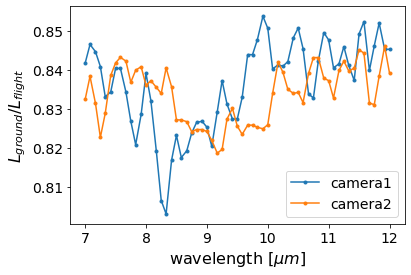

In [308]:
plt.plot(df1['wavelength'],(df1['val']-21800)/(df1g['val']-21800),'.-', label = "camera1")
plt.plot(df1['wavelength'],(df2['val']-21200)/(df2g['val']-21200),'.-', label = "camera2")
plt.xlabel('wavelength [$\mu m$]')
plt.ylabel('$L_{ground}/L_{flight}$')
plt.legend()